In [1]:

import heat_exchanger
from constants import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# increase figure size
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:

# read GA3_previous_desgins.csv

df = pd.read_csv('GA3_previous_designs.csv')

# remove weird group C designs
df = df[~((df["year"] == 2022) & (df["group"] == "Group-C"))] # remove group C 2022
df = df[~((df["year"] == 2023) & (df["group"] == "Group-C"))] # remove group C 2023

#df

In [3]:

HX = heat_exchanger.build_heat_exchanger([2],[2], 0.31, Side.OPPOSITE, Pattern.SQUARE)
HX.set_conditions([20, 60])


In [4]:
mdot_colds = np.zeros(len(df))
mdot_hots = np.zeros(len(df))
Qdots = np.zeros(len(df))
effs = np.zeros(len(df))

hot_passes = np.zeros(len(df))
cold_passes = np.zeros(len(df))

for i, row in enumerate(df.iterrows()):
    
    tubes = str(row[1]["Tubes"]).split(",")
    tubes = [int(t) for t in tubes]
    baffles = str(row[1]["Baffles"]).split(",")
    baffles = [int(b) for b in baffles]
    length = float(row[1]["Tube Length"])

    hot_passes[i] = len(tubes)
    cold_passes[i] = len(baffles)

    pattern_str = row[1]["Pattern"]
    if pattern_str == "SQUARE":
        pattern = Pattern.SQUARE
    elif pattern_str == "TRIANGLE":
        pattern = Pattern.TRIANGLE
    
    HX = heat_exchanger.build_heat_exchanger(tubes, baffles, length, Side.OPPOSITE, pattern)
    HX.set_conditions([20, 60])
    HX.characteristic_year = row[1]["year"]

    result = HX.compute_effectiveness(method = "LMTD", optimiser="fsolve")

    if not result:
        continue

    Qdots[i] = HX.Qdot
    effs[i] = HX.effectiveness
    mdot_colds[i] = HX.mdot[0]
    mdot_hots[i] = HX.mdot[1]




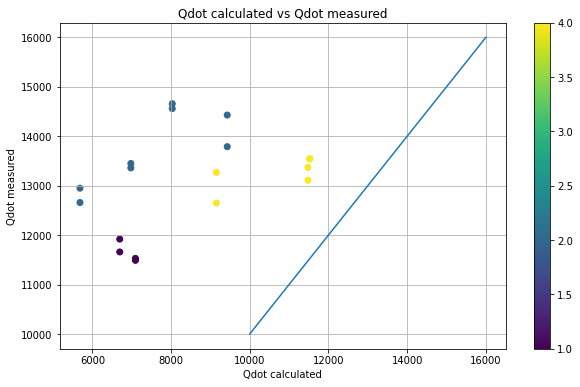

In [12]:
# plot Qdot calculated vs Qdot measured

lin = np.linspace(1e4, 1.6e4, 100)

plt.figure()
plt.scatter(Qdots, 1e3*df["Qcorr"], c=hot_passes)
plt.plot(lin, lin)
# colorbar
plt.colorbar()

plt.xlabel("Qdot calculated")
plt.ylabel("Qdot measured")
plt.title("Qdot calculated vs Qdot measured")
plt.grid()

# Does look terrible

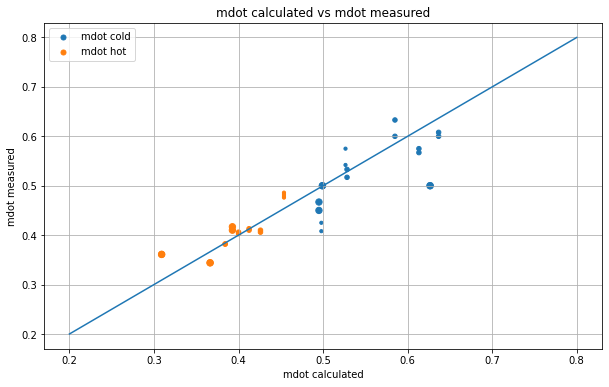

In [6]:
# plot mdot cold and mdot hot
lin = np.linspace(0.2, 0.8, 100)

plt.figure()
plt.scatter(mdot_colds, df["Flowrate1"], s=10 * hot_passes, label="mdot cold")
plt.scatter(mdot_hots, df["Flowrate2"],  s=10 * hot_passes, label="mdot hot")
plt.plot(lin, lin)

plt.xlabel("mdot calculated")
plt.ylabel("mdot measured")
plt.title("mdot calculated vs mdot measured")
plt.grid()
plt.legend()

# looks terrible need to fix


# sanity check measured mass flow and mass flow calculated from compressor characteristic data


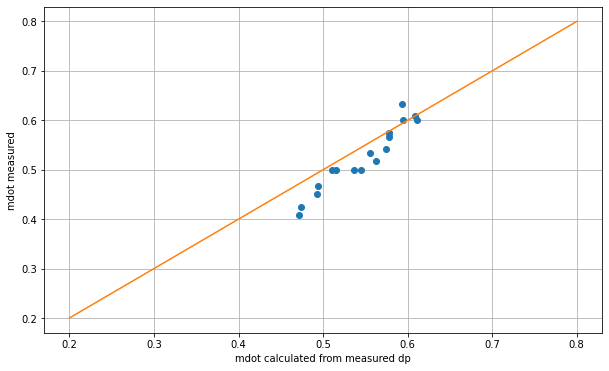

In [7]:
from heat_exchanger import cold_mass_flow_from_dp

mdot_cold_calc = np.zeros(len(df))

for i, row in enumerate(df.iterrows()):
    mdot_cold_calc[i] = cold_mass_flow_from_dp(row[1][" DP_meas1"] * 1e5, row[1]["year"])

plt.figure()
plt.plot(mdot_cold_calc, df["Flowrate1"], 'o')
plt.plot(lin, lin)
plt.xlabel("mdot calculated from measured dp")
plt.ylabel("mdot measured")
plt.grid()

plt.show()


# OK so the compressor characteristics are followed

[ 9.31806394e-01 -1.00644936e+03]


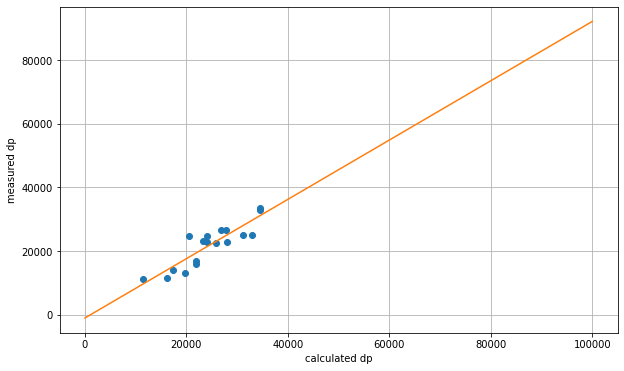

In [8]:
from heat_exchanger import dp_from_cold_mass_flow
# plot cold dp vs measured dp at measured mass flow

measured_cold_mdot = df["Flowrate1"]
measured_cold_dp = df[" DP_meas1"] * 1e5

calc_cold_dp = np.zeros(len(df))

for i, row in enumerate(df.iterrows()):
    calc_cold_dp[i] = dp_from_cold_mass_flow(row[1]["Flowrate1"], row[1]["year"])

linearfit = np.polyfit(calc_cold_dp, measured_cold_dp, 1)
linearfit_fn = np.poly1d(linearfit)
print(linearfit)

x = np.linspace(0, 1e5, 100)

plt.figure()
plt.plot(calc_cold_dp, measured_cold_dp, 'o')
plt.plot(x, linearfit_fn(x))
plt.xlabel("calculated dp")
plt.ylabel("measured dp")

plt.grid()
plt.show()


# same thing for hot

from heat_exchanger import hot_mass_flow_from_dp



mdot_hot_calc = np.zeros(len(df))
for i,row in enumerate(df.iterrows()):
    mdot_hot_calc[i] = hot_mass_flow_from_dp( * 1e5, row[1]["year"])




[ 1.18073779e+00 -5.91294176e+03]


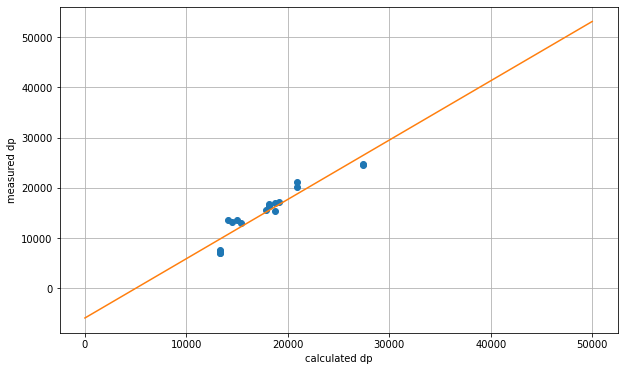

In [9]:
from heat_exchanger import dp_from_hot_mass_flow

measured_dp_hot = df["  DP_meas2"] * 1e5
calc_dp_hot = np.zeros(len(df))

for i, row in enumerate(df.iterrows()):
    calc_dp_hot[i] = dp_from_hot_mass_flow(row[1]["Flowrate2"], row[1]["year"])

linearfit = np.polyfit(calc_dp_hot, measured_dp_hot, 1)
linearfit_fn = np.poly1d(linearfit)
print(linearfit)

x = np.linspace(0, 5e4, 100)

plt.figure()
plt.plot(calc_dp_hot, measured_dp_hot, 'o')
plt.plot(x, linearfit_fn(x))
plt.xlabel("calculated dp")
plt.ylabel("measured dp")

plt.grid()

In [10]:
dp_colds = np.zeros(len(df))
dp_hots = np.zeros(len(df))
Qdots = np.zeros(len(df))
effs = np.zeros(len(df))

hot_passes = np.zeros(len(df))
cold_passes = np.zeros(len(df))

for i, row in enumerate(df.iterrows()):
    
    tubes = str(row[1]["Tubes"]).split(",")
    tubes = [int(t) for t in tubes]
    baffles = str(row[1]["Baffles"]).split(",")
    baffles = [int(b) for b in baffles]
    length = float(row[1]["Tube Length"])

    hot_passes[i] = len(tubes)
    cold_passes[i] = len(baffles)

    pattern_str = row[1]["Pattern"]
    if pattern_str == "SQUARE":
        pattern = Pattern.SQUARE
    elif pattern_str == "TRIANGLE":
        pattern = Pattern.TRIANGLE
    
    HX = heat_exchanger.build_heat_exchanger(tubes, baffles, length, Side.OPPOSITE, pattern)
    HX.set_conditions([20, 60])
    HX.characteristic_year = row[1]["year"]

    result = HX.compute_effectiveness(method = "LMTD", optimiser="fsolve")

    if not result:
        continue

    Qdots[i] = HX.Qdot
    effs[i] = HX.effectiveness
    dp_colds[i], dp_hots[i] = HX.calc_dp(HX.mdot)

[  0.86279134 121.77888182]
[ 1.62218865e+00 -1.28631797e+04]


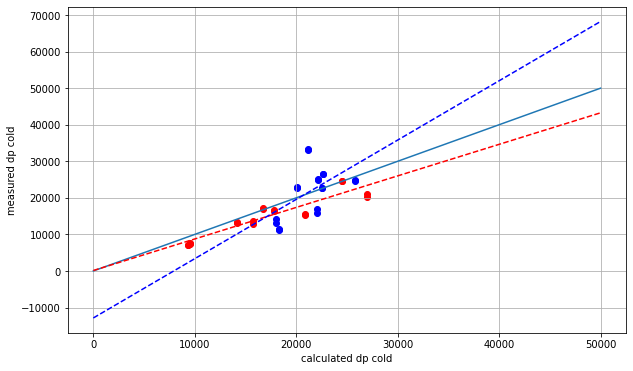

In [11]:

# plot

plt.figure()
plt.scatter(dp_colds, measured_cold_dp, c='blue')
plt.scatter(dp_hots, measured_dp_hot, c='red')

hot_lin_fit = np.polyfit(dp_hots, measured_dp_hot, 1)
hot_lin_fit_f  = np.poly1d(hot_lin_fit)
cold_lin_fit = np.polyfit(dp_colds, measured_cold_dp, 1)
cold_lin_fit_f = np.poly1d(cold_lin_fit)

print(hot_lin_fit)
print(cold_lin_fit)

plt.plot(x, x)
plt.plot(x, hot_lin_fit_f(x), 'r--')
plt.plot(x, cold_lin_fit_f(x), 'b--')
plt.xlabel("calculated dp cold")
plt.ylabel("measured dp cold")

plt.grid()
